<a href="https://colab.research.google.com/github/tejpal123456789/Image-Captioning/blob/main/Image_Captioning_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from glob import glob


In [ ]:
image_path='/content/drive/MyDrive/IMAGE CAPTIONING PROJECT/Images'
images=glob(image_path+'/*')

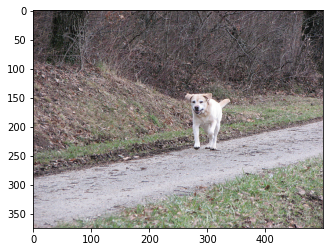

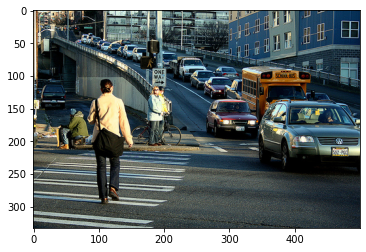

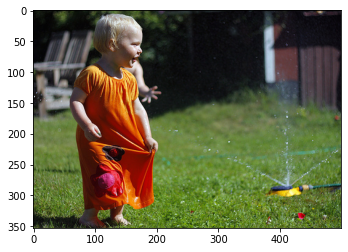

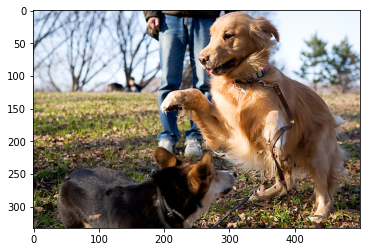

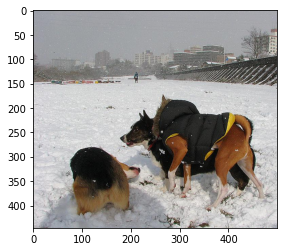

In [ ]:
import matplotlib.pyplot as plt
import cv2
for i in range(5):
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [ ]:
print(len(images))

8096


In [ ]:
caption_path = '/content/drive/MyDrive/IMAGE CAPTIONING PROJECT/Flickr8k.token.txt'
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [ ]:
print(len(captions))

40461


In [ ]:
images[1]

'/content/drive/MyDrive/IMAGE CAPTIONING PROJECT/Images/380590140_25b9889772.jpg'

In [ ]:
print(images[1].split('/')[-1])

380590140_25b9889772.jpg


In [ ]:
print(captions[0:5])

['1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .', '1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .', '1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .', '1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .', '1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .']


In [ ]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split('\t')[0][:-2] 
        caption = i.split('\t')[1]
        
        if img_name not in captions_dict:
         captions_dict[img_name] = [caption]
                
        else:
                captions_dict[img_name].append(caption)
            
    except:
        pass


In [ ]:
captions_dict['2095444126_201ff9f222.jpg']

['A dog is shaking off water .',
 'A dog shakes his head .',
 'A dog shakes off water',
 'A dog shakes off water and gets contorted .',
 'The dog is shaking water off of his body .']

In [ ]:
print(len(captions_dict.keys()))

8092


In [ ]:
caption_list=list(captions_dict.keys())
print(caption_list[0])

1000268201_693b08cb0e.jpg


In [ ]:
common_images=[]
for i in range(len(images)):
    for j in range(len(caption_list)):
        if images[i].split('/')[-1]==caption_list[j]:
            common_images.append(images[i].split('/')[-1])
    

In [ ]:
dict_of_common_images={}
for i in range(len(captions_dict.keys())):
    for j in range(len(common_images)):
        if caption_list[i]==common_images[j]:
            dict_of_common_images[common_images[j]]=captions_dict[common_images[j]]

            

In [ ]:
print(len(dict_of_common_images.keys()))

8091


In [ ]:
print(len(common_images))

8091


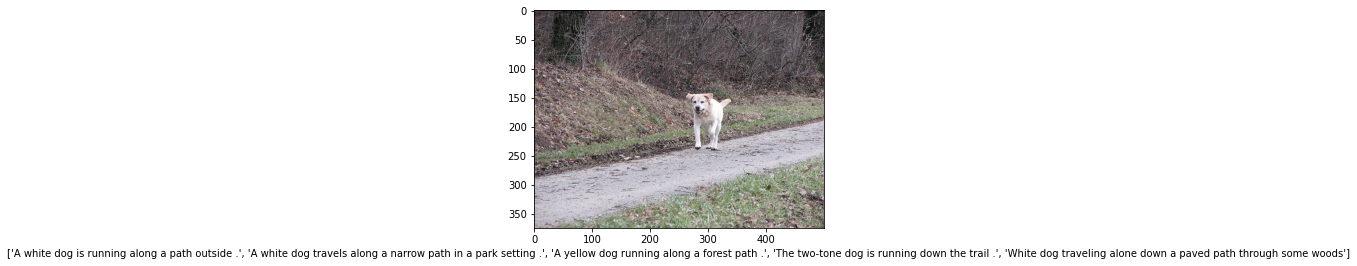

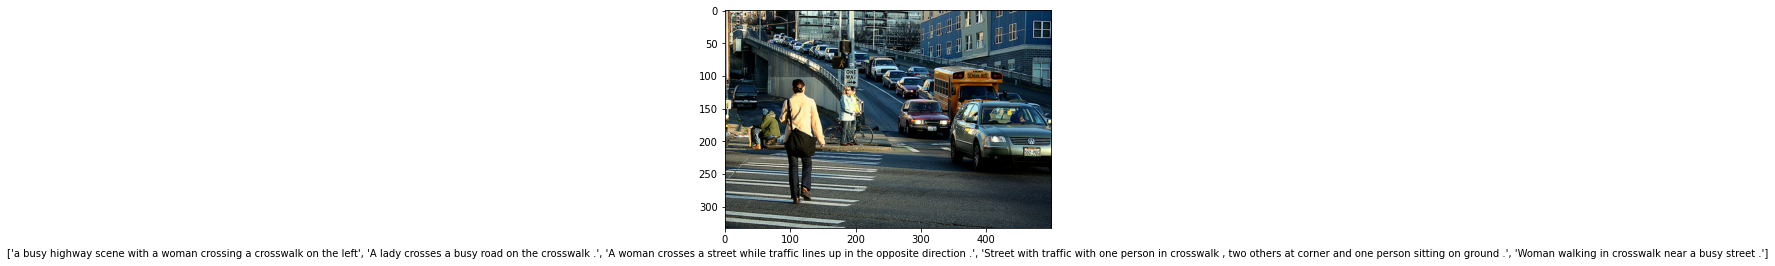

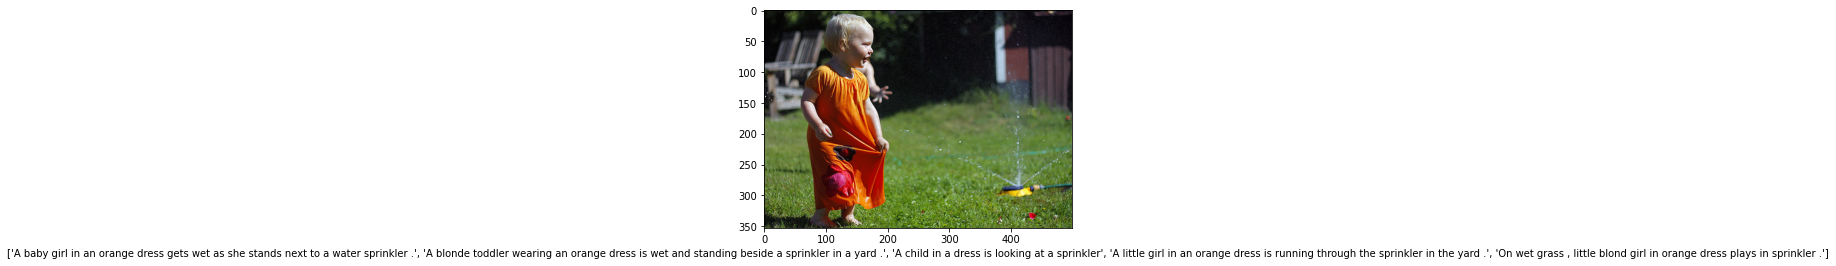

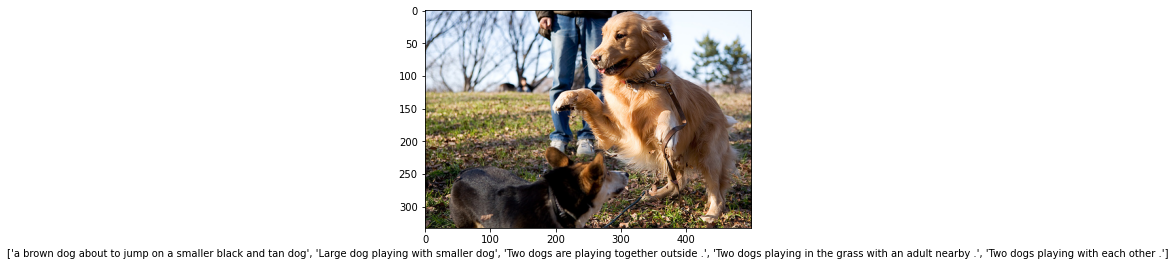

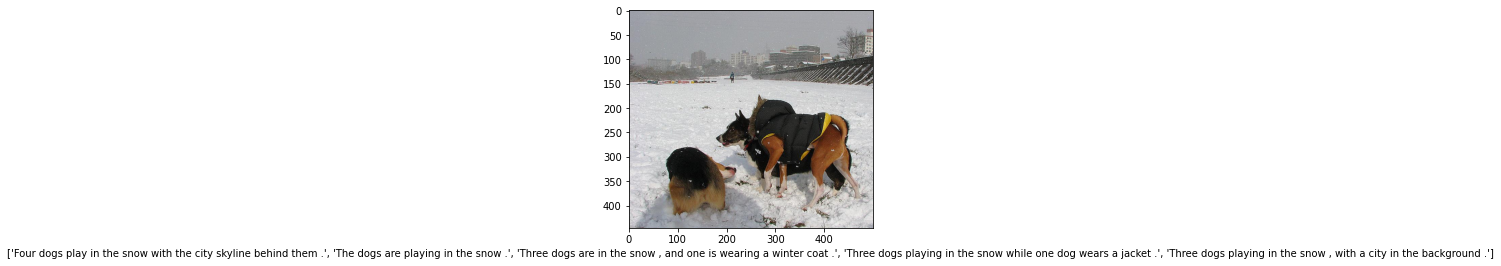

In [ ]:

for i in range(5):
    plt.figure()
    img_name = images[i]
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(dict_of_common_images[img_name.split('/')[-1]])
    plt.imshow(img)

Now we will extract the Features from the images with the help of Transfer Learning (VGG16)
 

In [ ]:
import tensorflow
from tensorflow.keras.models import Model,load_model
from keras.applications.resnet50 import ResNet50,preprocess_input
from keras.preprocessing import image


In [ ]:
model=ResNet50( weights='imagenet',input_shape=(224,224,3))

102973440/102967424 [==============================] - 1s 0us/step


In [ ]:
model_new=Model(model.input,model.layers[-2].output)

In [ ]:
model_new.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

Preprocessing The images

In [ ]:
def image_preprocessed(input):
    img=image.load_img(input,target_size=(224,224,3))
    img=image.img_to_array(img)
    
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    return img
    


In [ ]:
#image_preprocessed('/content/drive/MyDrive/IMAGE CAPTIONING PROJECT/Images/1000268201_693b08cb0e.jpg')

In [ ]:
# Extract features from the Images
def feature_extractor(input):
    img=image_preprocessed(input)
    feature_vector=model_new.predict(img)
    feature_vector=feature_vector.reshape(feature_vector.shape[1],)
    return feature_vector

In [ ]:
feature_extractor('/content/drive/MyDrive/IMAGE CAPTIONING PROJECT/Images/1000268201_693b08cb0e.jpg')

array([0.06535929, 0.16782546, 0.32517618, ..., 0.05107123, 0.32821226,
       1.004337  ], dtype=float32)

In [ ]:
image_encoder={}

##for i in range(len(common_images)):
    # img_path='/content/drive/MyDrive/IMAGE CAPTIONING PROJECT/Images/'+common_images[i]
     ###image_encoder[common_images[i]]=feature_extractor(img_path)
     #if i>2500:
     #   break

In [ ]:
import pickle
#try:
   #geeky_file = open('Image_Encoding', 'wb')
 ##  pickle.dump(image_encoder, geeky_file)
  # geeky_file.close()#
  
#except:
   # print("Something went wrong")
# loading of the pickle file 
file = open("/content/drive/MyDrive/IMAGE CAPTIONING PROJECT/Image_Encoding (1)",'rb')
image_encoded_data = pickle.load(file)  

In [ ]:
image_encoded_data.keys()

dict_keys(['378170167_9b5119d918.jpg', '380590140_25b9889772.jpg', '3767841911_6678052eb6.jpg', '387830531_e89c192b92.jpg', '377872672_d499aae449.jpg', '380034515_4fbdfa6b26.jpg', '3765374230_cb1bbee0cb.jpg', '383223174_7165a54c30.jpg', '384577800_fc325af410.jpg', '387974450_bcd205daac.jpg', '390986651_c801db91a0.jpg', '382151094_c7376cf22b.jpg', '381052465_722e00807b.jpg', '385835044_4aa11f6990.jpg', '381275595_b429fd1639.jpg', '381976882_0063d16d88.jpg', '3760400645_3ba51d27f9.jpg', '390992102_67fa31b22f.jpg', '386160015_d4b31df68e.jpg', '385186343_464f5fc186.jpg', '380527679_574749123d.jpg', '3759230208_1c2a492b12.jpg', '386656845_4e77c3e3da.jpg', '386655611_1329495f97.jpg', '388386075_9ac3a89ada.jpg', '3759492488_592cd78ed1.jpg', '390671130_09fdccd52f.jpg', '386470686_1ae9242878.jpg', '377872472_35805fc143.jpg', '390360326_26f5936189.jpg', '389643437_9a9830a3ba.jpg', '379006645_b9a2886b51.jpg', '390987167_2d5905b459.jpg', '381239475_044cbffa2b.jpg', '380041023_0dfd712ef1.jpg', '381

In [ ]:
image_encoded_data

{'378170167_9b5119d918.jpg': array([0.41527647, 0.16983056, 0.4447318 , ..., 0.55337465, 0.415395  ,
        0.        ], dtype=float32),
 '380590140_25b9889772.jpg': array([0.37754416, 0.5835345 , 0.01128613, ..., 0.2976699 , 0.26250494,
        0.29707384], dtype=float32),
 '3767841911_6678052eb6.jpg': array([1.9783792 , 2.2117944 , 0.12786898, ..., 0.21684968, 1.4538189 ,
        0.04140069], dtype=float32),
 '387830531_e89c192b92.jpg': array([0.23234414, 0.81916004, 0.43978363, ..., 0.04813989, 0.806062  ,
        0.32522163], dtype=float32),
 '377872672_d499aae449.jpg': array([1.2188609, 1.6181905, 0.4856935, ..., 0.2667293, 1.8459156,
        0.4578054], dtype=float32),
 '380034515_4fbdfa6b26.jpg': array([0.29137024, 0.01306509, 0.63937956, ..., 0.00232905, 0.08223413,
        0.14293297], dtype=float32),
 '3765374230_cb1bbee0cb.jpg': array([0.16550505, 0.72275305, 0.32863972, ..., 0.08149668, 0.01920902,
        0.        ], dtype=float32),
 '383223174_7165a54c30.jpg': array([1.

Now Preprocessing of the Text DATA

In [ ]:
all_captions=dict_of_common_images.values()
all_captions

dict_values([['A child in a pink dress is climbing up a set of stairs in an entry way .', 'A girl going into a wooden building .', 'A little girl climbing into a wooden playhouse .', 'A little girl climbing the stairs to her playhouse .', 'A little girl in a pink dress going into a wooden cabin .'], ['A black dog and a spotted dog are fighting', 'A black dog and a tri-colored dog playing with each other on the road .', 'A black dog and a white dog with brown spots are staring at each other in the street .', 'Two dogs of different breeds looking at each other on the road .', 'Two dogs on pavement moving toward each other .'], ['A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .', 'A little girl is sitting in front of a large painted rainbow .', 'A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .', 'There is a girl with pigtails sitting in front of a rainbow painting .', 'Young girl with pigtails p

In [ ]:
print(len(image_encoded_data))

2502


In [ ]:
print(len(dict_of_common_images))

8091


In [ ]:
#number_of_words=[]
##for k,all_caption in dict_of_common_images.items():
#    for j in range(len(list(image_encoded_data.keys()))):
 #       if k==list(image_encoded_data.keys())[j]:
 #           for caption in all_caption:
 #              for word in caption.split():
 #                   number_of_words.append(word)

#print('total number of words in all the caption are {}'.format(len(number_of_words)))
#print('total number of uniqu words in all the caption are {}'.format(len(set(number_of_words))))


In [ ]:
avaible_data={}
for k,vv in image_encoded_data.items():
    avaible_data[k]=dict_of_common_images[k]


avaible_data

{'378170167_9b5119d918.jpg': ['A white dog is running along a path outside .',
  'A white dog travels along a narrow path in a park setting .',
  'A yellow dog running along a forest path .',
  'The two-tone dog is running down the trail .',
  'White dog traveling alone down a paved path through some woods'],
 '380590140_25b9889772.jpg': ['a busy highway scene with a woman crossing a crosswalk on the left',
  'A lady crosses a busy road on the crosswalk .',
  'A woman crosses a street while traffic lines up in the opposite direction .',
  'Street with traffic with one person in crosswalk , two others at corner and one person sitting on ground .',
  'Woman walking in crosswalk near a busy street .'],
 '3767841911_6678052eb6.jpg': ['A baby girl in an orange dress gets wet as she stands next to a water sprinkler .',
  'A blonde toddler wearing an orange dress is wet and standing beside a sprinkler in a yard .',
  'A child in a dress is looking at a sprinkler',
  'A little girl in an orang

Now we will make dataframe of the images and their corresponding captions.(Dealing with dataFrame is quite easy for me)

In [ ]:
Images=[]
caption_of_images=[]
for k,all_captions in avaible_data.items():
    for caption in all_captions:
        Images.append(k)
        caption_of_images.append(caption)



In [ ]:
data_collection=pd.DataFrame(list(zip(Images, caption_of_images)),
               columns =['Image ID', 'CAPTION'])       

In [ ]:
data_collection.head()

Image ID                                            CAPTION
0  378170167_9b5119d918.jpg      A white dog is running along a path outside .
1  378170167_9b5119d918.jpg  A white dog travels along a narrow path in a p...
2  378170167_9b5119d918.jpg         A yellow dog running along a forest path .
3  378170167_9b5119d918.jpg       The two-tone dog is running down the trail .
4  378170167_9b5119d918.jpg  White dog traveling alone down a paved path th...

In [ ]:
all_word_number=[word for sentence in data_collection['CAPTION'] for word in sentence.split() ]
print(len(all_word_number))

147484


In [ ]:
all_unique_word=set(all_word_number)
print(len(all_unique_word))

5466


In [ ]:
import string
def CleanTokenize(text):
    

    #for line in data['headline']:
        
        # tokenize the text
        tokens = [token.lower() for token in text.split()]
        # remove puntuations
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        # remove non alphabetic characters
        words = [word for word in stripped if word.isalpha()]
       # stop_words = set(stopwords.words("english"))
        # remove stop words
      # words = [w for w in words if not w in stop_words]
        
        return ' '.join(words)


In [ ]:
x='Jhds kbadkka kjabsdas2 98 ^mnkjd'
print(CleanTokenize(x))


jhds kbadkka mnkjd


In [ ]:
data_collection['CAPTION']=data_collection['CAPTION'].apply(lambda x: CleanTokenize(x))

In [ ]:
data_collection.head()

Image ID                                            CAPTION
0  378170167_9b5119d918.jpg        a white dog is running along a path outside
1  378170167_9b5119d918.jpg  a white dog travels along a narrow path in a p...
2  378170167_9b5119d918.jpg           a yellow dog running along a forest path
3  378170167_9b5119d918.jpg          the twotone dog is running down the trail
4  378170167_9b5119d918.jpg  white dog traveling alone down a paved path th...

In [ ]:
data_collection['CAPTION']=data_collection['CAPTION'].apply(lambda x: '<start> ' +x+' <end>')

In [ ]:
data_collection.head()

Image ID                                            CAPTION
0  378170167_9b5119d918.jpg  <start> a white dog is running along a path ou...
1  378170167_9b5119d918.jpg  <start> a white dog travels along a narrow pat...
2  378170167_9b5119d918.jpg  <start> a yellow dog running along a forest pa...
3  378170167_9b5119d918.jpg  <start> the twotone dog is running down the tr...
4  378170167_9b5119d918.jpg  <start> white dog traveling alone down a paved...

NOW , MAKe VECTORS

In [ ]:

import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, Sequential
from keras.layers import GRU, Input, Dense, TimeDistributed, Activation, RepeatVector, Bidirectional, Dropout, LSTM
from keras.layers.embeddings import Embedding
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy

In [ ]:
def tokenizer(x):
    """
    Tokenize x
    :param x: List of sentences/strings to be tokenized
    :return: Tuple of (tokenized x data, tokenizer used to tokenize x)
    """
    # TODO: Implement
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(x)
    return tokenizer.texts_to_sequences(x), tokenizer


# Tokenize Example output
text_sentences = [
    'The quick brown fox jumps over the lazy dog .',
    'By Jove , my quick study of lexicography won a prize .',
    'This is a short sentence .']
y=tokenizer(text_sentences)  
text_tokenized, text_tokenizer = tokenizer(text_sentences)
print(text_tokenizer.word_index) 
print(text_tokenized)
#print(text_tokenizer)

{'the': 1, 'quick': 2, 'a': 3, 'brown': 4, 'fox': 5, 'jumps': 6, 'over': 7, 'lazy': 8, 'dog': 9, 'by': 10, 'jove': 11, 'my': 12, 'study': 13, 'of': 14, 'lexicography': 15, 'won': 16, 'prize': 17, 'this': 18, 'is': 19, 'short': 20, 'sentence': 21}
[[1, 2, 4, 5, 6, 7, 1, 8, 9], [10, 11, 12, 2, 13, 14, 15, 16, 3, 17], [18, 19, 3, 20, 21]]


In [ ]:
input_tokenized,input_tokenizer=tokenizer(data_collection['CAPTION'])
print(input_tokenizer.word_index)
 

{'a': 1, 'end': 2, 'start': 3, 'in': 4, 'the': 5, 'on': 6, 'is': 7, 'and': 8, 'with': 9, 'dog': 10, 'man': 11, 'of': 12, 'two': 13, 'are': 14, 'white': 15, 'black': 16, 'woman': 17, 'girl': 18, 'to': 19, 'boy': 20, 'people': 21, 'wearing': 22, 'water': 23, 'at': 24, 'red': 25, 'young': 26, 'brown': 27, 'an': 28, 'his': 29, 'dogs': 30, 'blue': 31, 'playing': 32, 'through': 33, 'while': 34, 'standing': 35, 'down': 36, 'shirt': 37, 'ball': 38, 'person': 39, 'running': 40, 'little': 41, 'grass': 42, 'sitting': 43, 'jumping': 44, 'over': 45, 'snow': 46, 'three': 47, 'front': 48, 'holding': 49, 'child': 50, 'yellow': 51, 'green': 52, 'small': 53, 'group': 54, 'up': 55, 'field': 56, 'by': 57, 'large': 58, 'her': 59, 'walking': 60, 'one': 61, 'men': 62, 'air': 63, 'children': 64, 'into': 65, 'near': 66, 'street': 67, 'girls': 68, 'bike': 69, 'riding': 70, 'jumps': 71, 'beach': 72, 'its': 73, 'mouth': 74, 'for': 75, 'pink': 76, 'another': 77, 'as': 78, 'stands': 79, 'outside': 80, 'from': 81, '

In [ ]:
word_to_idx=input_tokenizer.word_index
print(word_to_idx)

{'a': 1, 'end': 2, 'start': 3, 'in': 4, 'the': 5, 'on': 6, 'is': 7, 'and': 8, 'with': 9, 'dog': 10, 'man': 11, 'of': 12, 'two': 13, 'are': 14, 'white': 15, 'black': 16, 'woman': 17, 'girl': 18, 'to': 19, 'boy': 20, 'people': 21, 'wearing': 22, 'water': 23, 'at': 24, 'red': 25, 'young': 26, 'brown': 27, 'an': 28, 'his': 29, 'dogs': 30, 'blue': 31, 'playing': 32, 'through': 33, 'while': 34, 'standing': 35, 'down': 36, 'shirt': 37, 'ball': 38, 'person': 39, 'running': 40, 'little': 41, 'grass': 42, 'sitting': 43, 'jumping': 44, 'over': 45, 'snow': 46, 'three': 47, 'front': 48, 'holding': 49, 'child': 50, 'yellow': 51, 'green': 52, 'small': 53, 'group': 54, 'up': 55, 'field': 56, 'by': 57, 'large': 58, 'her': 59, 'walking': 60, 'one': 61, 'men': 62, 'air': 63, 'children': 64, 'into': 65, 'near': 66, 'street': 67, 'girls': 68, 'bike': 69, 'riding': 70, 'jumps': 71, 'beach': 72, 'its': 73, 'mouth': 74, 'for': 75, 'pink': 76, 'another': 77, 'as': 78, 'stands': 79, 'outside': 80, 'from': 81, '

In [ ]:
idx_to_word= dict((i, token) for token, i in word_to_idx.items())
print(idx_to_word)

{1: 'a', 2: 'end', 3: 'start', 4: 'in', 5: 'the', 6: 'on', 7: 'is', 8: 'and', 9: 'with', 10: 'dog', 11: 'man', 12: 'of', 13: 'two', 14: 'are', 15: 'white', 16: 'black', 17: 'woman', 18: 'girl', 19: 'to', 20: 'boy', 21: 'people', 22: 'wearing', 23: 'water', 24: 'at', 25: 'red', 26: 'young', 27: 'brown', 28: 'an', 29: 'his', 30: 'dogs', 31: 'blue', 32: 'playing', 33: 'through', 34: 'while', 35: 'standing', 36: 'down', 37: 'shirt', 38: 'ball', 39: 'person', 40: 'running', 41: 'little', 42: 'grass', 43: 'sitting', 44: 'jumping', 45: 'over', 46: 'snow', 47: 'three', 48: 'front', 49: 'holding', 50: 'child', 51: 'yellow', 52: 'green', 53: 'small', 54: 'group', 55: 'up', 56: 'field', 57: 'by', 58: 'large', 59: 'her', 60: 'walking', 61: 'one', 62: 'men', 63: 'air', 64: 'children', 65: 'into', 66: 'near', 67: 'street', 68: 'girls', 69: 'bike', 70: 'riding', 71: 'jumps', 72: 'beach', 73: 'its', 74: 'mouth', 75: 'for', 76: 'pink', 77: 'another', 78: 'as', 79: 'stands', 80: 'outside', 81: 'from', 8

In [ ]:
print(len(input_tokenizer.word_index))

5106


In [ ]:
decoded_captions=tokenizer(data_collection['CAPTION'])


Padded Data

In [ ]:
def pad(x, length=None):
    """
    Pad x
    :param x: List of sequences.
    :param length: Length to pad the sequence to.  If None, use length of longest sequence in x.
    :return: Padded numpy array of sequences
    """
    # TODO: Implement
    return pad_sequences(x, maxlen=length, padding='post')



# Pad Tokenized output
test_pad = pad(text_tokenized) 
for sample_i, (token_sent, pad_sent) in enumerate(zip(text_tokenized, test_pad)):
    print('Sequence {} in x'.format(sample_i + 1))
    print('  Input:  {}'.format(np.array(token_sent)))
    print('  Output: {}'.format(pad_sent))

Sequence 1 in x
  Input:  [1 2 4 5 6 7 1 8 9]
  Output: [1 2 4 5 6 7 1 8 9 0]
Sequence 2 in x
  Input:  [10 11 12  2 13 14 15 16  3 17]
  Output: [10 11 12  2 13 14 15 16  3 17]
Sequence 3 in x
  Input:  [18 19  3 20 21]
  Output: [18 19  3 20 21  0  0  0  0  0]


In [ ]:
decoded_captions[0][1]

[3, 1, 15, 10, 1255, 113, 1, 1383, 165, 4, 1, 98, 508, 2]

Setting up the train and test

In [ ]:
print(len(image_encoded_data.keys()))

2502


In [ ]:
data_collection.shape

(12510, 2)

In [ ]:
def max_length(data_collection):
   maxlength=max([len(sentence.split()) for sentence in data_collection['CAPTION']])
   print(maxlength)
   return

In [ ]:
maxlength=max_length(data_collection)

33


In [ ]:
data_collection['Image ID'][1]
image_encoded_data[data_collection['Image ID'][1]]

array([0.41527647, 0.16983056, 0.4447318 , ..., 0.55337465, 0.415395  ,
       0.        ], dtype=float32)

In [ ]:
from keras.utils import to_categorical

In [ ]:
#def generator(MAX_LEN,VOCAB_SIZE):
    
    
X = []
y_in = []
y_out = []
    
for i in range(data_collection.shape[0]):
        for j in range(1,len(decoded_captions[0][i])):
                X.append(image_encoded_data[data_collection['Image ID'][i]])

                in_seq= [decoded_captions[0][i][:j]]
                out_seq = decoded_captions[0][i][j]
                

                in_seq = pad_sequences(in_seq, maxlen=31, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=5583)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
    

In [ ]:
len(X),len(y_in),len(y_out)

(147495, 147495, 147495)

In [ ]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')

In [ ]:
X.shape, y_in.shape, y_out.shape

((147495, 2048), (147495, 31), (147495, 5583))

In [ ]:
from keras.layers.merge import add

In [ ]:

# define the captioning model
def define_model(vocab_size, max_length):
	# feature extractor model
	inputs1 = Input(shape=(2048,))
	fe1 = Dropout(0.5)(inputs1)
	fe2 = Dense(256, activation='relu')(fe1)
	# sequence model
	inputs2 = Input(shape=(max_length,))
	se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
	se2 = Dropout(0.5)(se1)
	se3 = LSTM(256)(se2)
	# decoder model
	decoder1 = add([fe2, se3])
	decoder2 = Dense(256, activation='relu')(decoder1)
	outputs = Dense(vocab_size, activation='softmax')(decoder2)
	# tie it together [image, seq] [word]
	model = Model(inputs=[inputs1, inputs2], outputs=outputs)
	model.compile(loss='categorical_crossentropy', optimizer='adam')
	# summarize model
	print(model.summary())
	return model

In [ ]:
vocab_size=5583
max_length=31

In [ ]:
# train the model
model = define_model(vocab_size, max_length)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 31)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 2048)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 31, 256)      1429248     input_3[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 2048)         0           input_2[0][0]                    
____________________________________________________________________________________________

In [ ]:
#model.fit([X, y_in], y_out, batch_size=512, epochs=20)

In [ ]:
#model.save('image_captioner.h5')  # creates a HDF5 file 'my_model.h5'

Predictions:

In [ ]:
# Preprocess Image Data

In [ ]:
model=load_model('/content/drive/MyDrive/IMAGE CAPTIONING PROJECT/image_captioner.h5')


In [ ]:
def predict_caption(photo):
    in_text='start'
    for i in range(31):
        sequence=[word_to_idx[word] for word in in_text.split() if word in word_to_idx]
        sequence=pad_sequences([sequence],maxlen=31,padding='post')
        y_pred=model.predict([photo,sequence])
        y_pred=y_pred.argmax()
        word=idx_to_word[y_pred]
        in_text+=' '+word
        if word=='end':
            break

    final_caption=in_text.split()
    return final_caption

In [ ]:
images=image_encoded_data.keys()
list(images)[1]

'380590140_25b9889772.jpg'

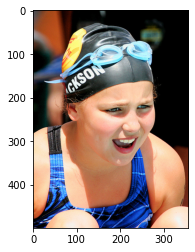

caption generated:a girl with a swim cap and goggles and goggles
original caption:['A girl in a bathing suit , swim cap and goggles .', 'a girl wearing a swim cap and goggles on her head at a swim meet', 'A young female wearing a swimsuit , goggles , and swimming cap looking in front of her with an open mouth .', 'A young girl is wearing a blue patterned swimsuit , a black and yellow swim cap and has blue swim goggles on her head .', 'A young girl sitting in swimming gear']


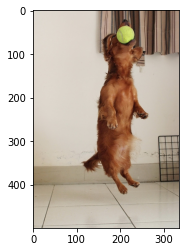

caption generated:a small brown dog is jumping up to catch a tennis ball
original caption:['A dog has jumped in the air to catch a tennis ball .', 'A small brown dog jumping up to catch a tennis ball .', 'A small brown dog jumps and catches a tennis ball', 'A small dog jumping with a ball in its mouth .', 'Small dog catches a tennis ball in its mouth indoors .']


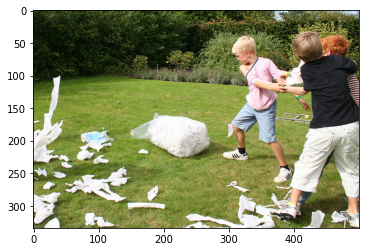

caption generated:three boys and a little girl struggling for a bag of trash
original caption:['A group of young boys fight over a bag of trash .', 'Three boys are struggling with one another and reaching for bag of litter .', 'Three boys standing in a yard with a bunch of paper .', 'Three people are outside with something on the grass .', 'Two boys , surrounded by paper pieces , hold a third boys shirt to prevent him from grabbing a bag .']


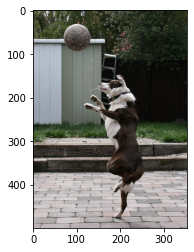

caption generated:a dog jumps to meet a ball
original caption:['A brown and white dog is standing on its hind legs reaching for a ball .', 'A dog jumps to meet a soccer ball flying towards it .', 'A dog stands on one leg and tries to get a soccer ball .', 'Black and white dog jumps for ball .', 'The brown and white dog is jumping up in an attempt to catch a ball .']


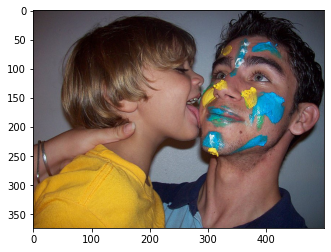

caption generated:a boy licks a slice of a yellow and yellow yellow ring
original caption:["A boy licks an older male 's face that 's covered in a blue and yellow creamy substance .", 'A child in a yellow shirt is licking brightly colored food off of a mans cheek .', "A young boy is licking blue and yellow frosting off a young man 's face .", "A young boy is licking colored frosting off a young man 's face .", 'Someone licks the face of a man with blue and yellow paint on his face .']


In [ ]:
for i in range(5):
    rn=np.random.randint(0,1000)
    img_name=list(image_encoded_data.keys())[rn]

    photo=image_encoded_data[img_name].reshape((1,2048))
    i=plt.imread('/content/drive/MyDrive/IMAGE CAPTIONING PROJECT/Images/'+img_name)
    plt.imshow(i)
    plt.show()
    caption=predict_caption(photo)
    caption=caption[1:-1]
    caption=' '.join(caption)
    print('caption generated:{}'.format(caption))
    print('original caption:{}'.format(avaible_data[img_name]))


### Image caption on the random image

In [ ]:
features_of_image=feature_extractor('/content/drive/MyDrive/IMAGE CAPTIONING PROJECT/image_caption.jpg')
features_of_image

array([0.32418394, 1.081001  , 0.        , ..., 1.8064208 , 0.34036574,
       0.06173939], dtype=float32)

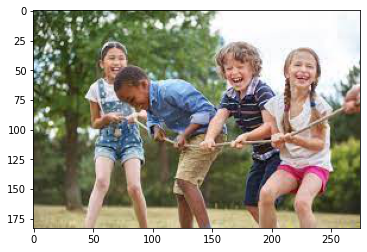

caption generated:five children are running along a field


In [ ]:
photo=features_of_image.reshape((1,2048))
i=plt.imread("/content/drive/MyDrive/IMAGE CAPTIONING PROJECT/image_caption.jpg")
plt.imshow(i)
plt.show()
caption=predict_caption(photo)
caption=caption[1:-1]
caption=' '.join(caption)
print('caption generated:{}'.format(caption))


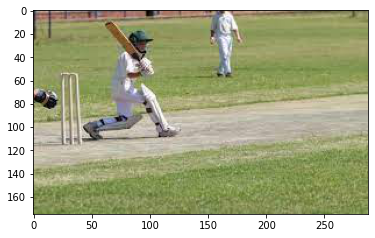

caption generated:a boy is playing cricket on a baseball field


In [ ]:
photo=feature_extractor('/content/drive/MyDrive/IMAGE CAPTIONING PROJECT/download (1).jpg').reshape((1,2048))
i=plt.imread("/content/drive/MyDrive/IMAGE CAPTIONING PROJECT/download (1).jpg")
plt.imshow(i)
plt.show()
caption=predict_caption(photo)
caption=caption[1:-1]
caption=' '.join(caption)
print('caption generated:{}'.format(caption))
